### Data Munging - Manipulando Dados para Previsão de AVC

O Acidente Vascular Cerebral (AVC) acontece quando vasos que levam sangue ao cerébro entopem ou se ronpem, provocando a paralisia da área cerebral que ficou sem circulação sanguínea. É uma doença que acomete mais os homens e é uma das principais causas de morte, incapacitação e internações em todo o mundo.

Quanto mais rápido for o diagnóstico e o tratamento do AVC, maiores serão as chances de recuperação completa. Desta forma, torna-se primordial ficar atento aos sinais e sintomas e procurar atendimento médico imediato.

Existem dois tipos de AVC, que ocorrem por motivos diferentes: AVC hemorrágico e AVC isquêmico;

O que é AVC isquêmico:

O AVC isquêmico ocorre quando há obstrução de uma artéria, impedindo a passagem de oxigêncio para células cerebrais, que acabam morrendo. Essa obstrução pode acontecer devido a um trombo (trombose) ou a um âmbolo (ambolia). O AVC isquêmico é o mais comum e representa 85% de todos os casos.

O que é AVC hemorragico:

O AVC hemorrágico ocorre quando há rompimento de um vaso cerebral, provocando hemorragia. Esta hemorragia pode acontecer dentro do tecido cerebral ou na superfice entre o cerébro e a meninge. É responsável por 15% de todos os casos de AVC, mas pode causar a morte com mais frequência do que o AVC isquêmico.

Existem diversos fatores que aumentam a probabilidade de ocorrência de um AVC, seja ele hemorrágico ou isquêmico. Os principais fatores causais das doenças são:

- Hipertensão;
- Diabetes tipo 2;
- Colesterol alto;
- Sobrepeso;
- Obesidade;
- Tabagismo;
- Uso excessivo de álcool;
- idade avançada;
- Sedentarismo;
- Uso de drogas ilícitas;
- Histórico familiar;
- Ser do sexo masculino;

O AVC está altamente relacionado à idade, hipertensão, nível médico, status de tabagismo e IMC, enquanto isso depende parcialmente do sexo, doença cardíaca, tipo de trabalho e tipo de residência.

###### Carregando os Dados

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# carregando os dados
dataset = pd.read_csv('dados/dataset-data-munging-01.csv')

In [6]:
# Visualisando os primeiros registros
dataset.head()

,id,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,30669,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,NaN,0
1,30468,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0
2,16523,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,NaN,0
3,56543,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,46136,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,NaN,0


In [7]:
# Formato dos dados
dataset.shape

(43400, 12)

In [8]:
# tipos dos dados
dataset.dtypes

id                       int64
sexo                    object
idade                  float64
hipertensao              int64
doenca_coracao           int64
casado                  object
tipo_trabalho           object
tipo_residencia         object
media_nivel_glicose    float64
imc                    float64
status_tabagismo        object
avc                      int64
dtype: object

In [11]:
dataset['avc'].value_counts()

0    42617
1      783
Name: avc, dtype: int64

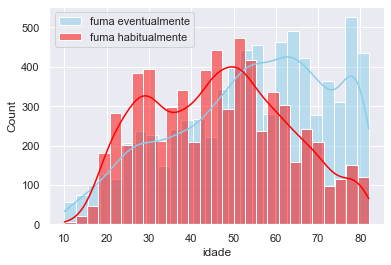

In [4]:
# Comparação entre as faixas de idade que tendem a fumar habitualmente e ocasionalmente
sns.set(style="darkgrid")

sns.histplot(data=dataset[(dataset.status_tabagismo == 'fuma eventualmente')], x="idade", color="skyblue", label="fuma eventualmente", kde=True)
sns.histplot(data=dataset[(dataset.status_tabagismo == 'fuma')], x="idade", color="red", label="fuma habitualmente", kde=True)

plt.legend() 
plt.show()

##### Removendo Colunas Irrelevantes

O AVC está altamente relacionado à idade, hipertensão, nível médio de glicose, status de tabagismo e IMC, enquanto isso depende parcialmente do sexo, doença cardíaca, tipo de trabalho e tipo de residência.

In [35]:
# Excluímos a coluna id porque esse é apenas o número atribuído a cada paciente sem relevância com a AVC
del dataset['id']

In [36]:
# Excluimos a coluna "casado", já que não parece ser um bom identificador para prever um AVC,
# algumas pessoas gostam de se casar, outras não, o que pode resultar em hipertensão ou vida estressada.
del dataset['casado']

In [14]:
# coletando estatísticas das colunas
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [17]:
# extraindo váriaveis do tipo categóricas
dfcatname = dataset.dtypes[dataset.dtypes == 'object'].index
dfcatname

Index(['sexo', 'tipo_trabalho', 'tipo_residencia', 'status_tabagismo'], dtype='object')

In [19]:
# extraindo váriaveis do tipo numéricas contínuas
dfconname = [item for item in list(dataset.columns) if item not in list(dfcatname)]
dfconname

['idade', 'hipertensao', 'doenca_coracao', 'media_nivel_glicose', 'imc', 'avc']

In [22]:
# descrevendo as váriaveis categóricas
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43400,43400,43400,30108
unique,3,5,2,3
top,Feminino,Privado,Urbana,nunca fumou
freq,25665,24834,21756,16053


###### Tratamento de Valores Missing no IMC

In [23]:
# Coletando estatísticas da coluna de IMC
dataset['imc'].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: imc, dtype: float64

In [24]:
# Checando por valores missing
dataset['imc'].isnull().sum()

1462

Uma maneira de tratar um valor ausente é simplesmente remover o registro completo, neste dataset teria de ser removido 1462/43400 o que é um número relativamente pequeno.

Outra solução quando se trabalha com variáveis numéricas é imputar zero, valores centrais ou estatisticamente estimados, no lugar de NAN.

Para verificar se podemos atribuir valor central, vamos plotar o histograma

array([[<AxesSubplot:title={'center':'imc'}>]], dtype=object)

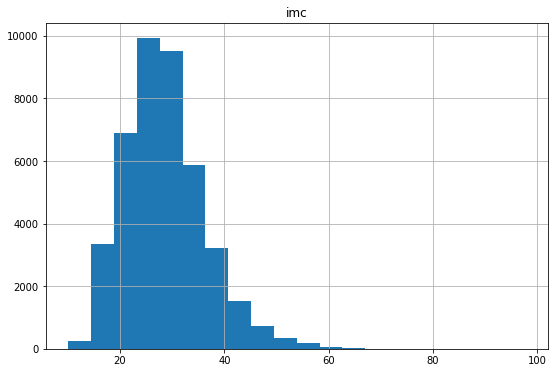

In [26]:
dataset.hist(column = 'imc', figsize=(9,6), bins=20)

Vê-se no histograma que o valor do IMC entre 20 e 40 é o mais comum, portanto não é totalmente irracional utiliza-lo no lugar de valores missing.

Vamos inputar a tendência central (média) no lugar de valores ausentes

In [37]:
# Gera o novo IMC
# Onde for nulo, preenche com a média
novo_imc = np.where(dataset['imc'].isnull(), dataset['imc'].mean(), dataset['imc'])

In [38]:
novo_imc

array([18. , 39.2, 17.6, ..., 28.9, 33.2, 20.6])

In [39]:
# Grava o novo valor de imc no dataset
dataset['imc'] = novo_imc

In [40]:
dataset['imc'].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

array([[<AxesSubplot:title={'center':'imc'}>]], dtype=object)

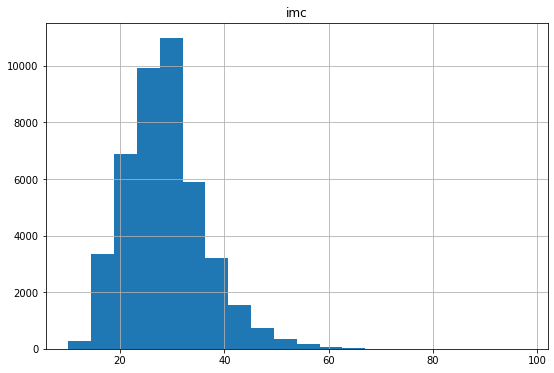

In [41]:
# checando o histograma
dataset.hist(column = 'imc', figsize=(9,6), bins=20)

###### Tratamente de Valores Missing no Status de Tabagismo

In [43]:
# Descrevendo as variáveis categóricas
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43400,43400,43400,30108
unique,3,5,2,3
top,Feminino,Privado,Urbana,nunca fumou
freq,25665,24834,21756,16053


In [44]:
dataset['status_tabagismo'].describe()

count           30108
unique              3
top       nunca fumou
freq            16053
Name: status_tabagismo, dtype: object

In [45]:
dataset['status_tabagismo'].isnull().sum()

13292

<AxesSubplot:>

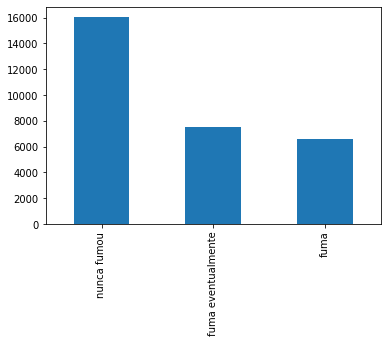

In [47]:
dataset['status_tabagismo'].value_counts().plot(kind='bar')

Vamos preencher os valores missing com uma nova categoria chamada "desconhecido".

In [48]:
novo_status_tabagismo = np.where(dataset['status_tabagismo'].isnull(), "desconhecido", dataset['status_tabagismo'])

In [49]:
dataset['status_tabagismo'] = novo_status_tabagismo

In [50]:
dataset['status_tabagismo'].describe()

count           43400
unique              4
top       nunca fumou
freq            16053
Name: status_tabagismo, dtype: object

<AxesSubplot:>

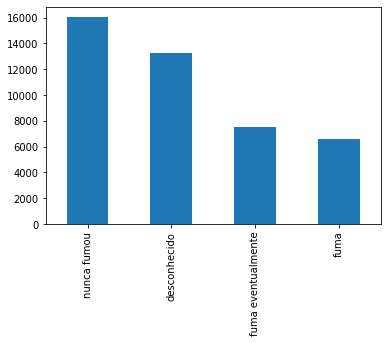

In [51]:
dataset['status_tabagismo'].value_counts().plot(kind='bar')

In [52]:
dataset.count()

sexo                   43400
idade                  43400
hipertensao            43400
doenca_coracao         43400
tipo_trabalho          43400
tipo_residencia        43400
media_nivel_glicose    43400
imc                    43400
status_tabagismo       43400
avc                    43400
dtype: int64

###### Tratamento de Outliers

In [80]:
 dataset[dfconname]

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0
43396,56.0,0,0,213.61,55.4,0
43397,82.0,1,0,91.94,28.9,0
43398,40.0,0,0,99.16,33.2,0


In [81]:
# descrição da variavel idade
dataset[dfconname[0]].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: idade, dtype: float64

In [82]:
# descrição da variavel média_nivel_glicose
dataset[dfconname[3]].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: media_nivel_glicose, dtype: float64

In [83]:
# descrição da variavel IMC
dataset[dfconname[4]].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

<AxesSubplot:>

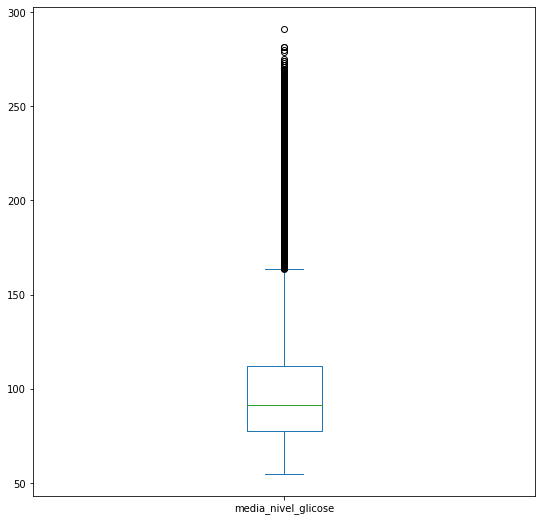

In [86]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
# Variável media_nivel_glicose
dataset[dfconname[3]].plot(kind='box', figsize=(9,9))

In [87]:
# Removendo outliers
index1 = np.where(dataset['media_nivel_glicose'] == max(dataset['media_nivel_glicose']) )

In [88]:
dataset.loc[index1]

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
38446,Feminino,80.0,0,0,Privado,Rural,291.05,28.7,nunca fumou,0


In [89]:
# É eliminado o registro por ser um valor muito pequeno de registro em relação ao dataset como um todo
dataset = dataset.drop(index1[0])

<AxesSubplot:>

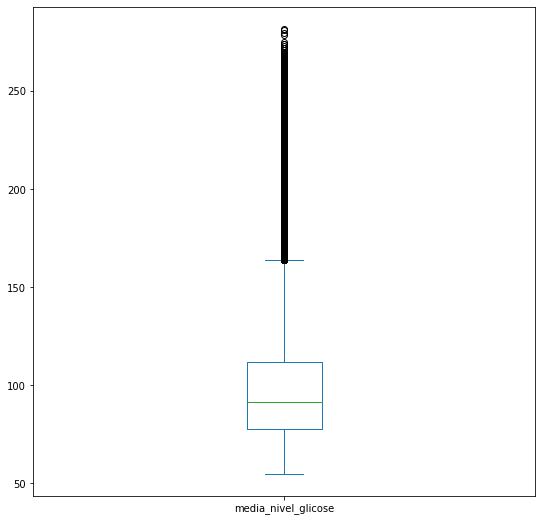

In [90]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados
dataset[dfconname[3]].plot(kind='box', figsize=(9,9))

<AxesSubplot:>

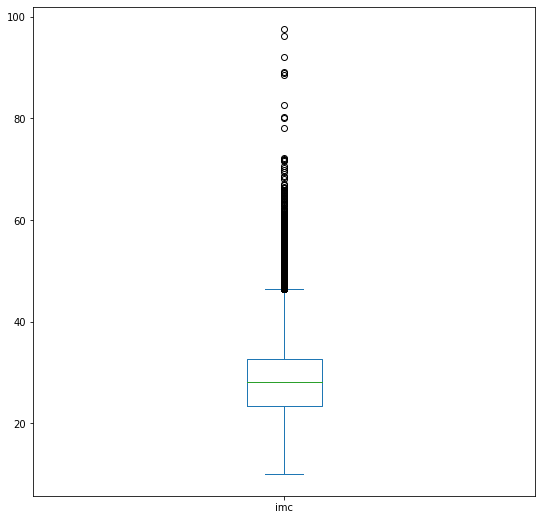

In [91]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
# Variável media_nivel_glicose
dataset[dfconname[4]].plot(kind='box', figsize=(9,9))

In [92]:
index2 = np.where(dataset['imc'] == max(dataset['imc']))

In [94]:
dataset.loc[index2]

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
1913,Masculino,17.0,1,0,Privado,Rural,61.67,97.6,desconhecido,0


O valor do imc pode chegar ao máximo de até 54, o que também é um caso muito raro, mas nosso conjunto de dados tem alguns valores maiores que 54, que também atuam apenas como outliers, pode-ser preferido remove-los mantendo a mergem. Isso não afetará os dados, e os manteram realistas

In [95]:
dataset = dataset[dataset['imc'] < 60]

In [96]:
dataset.count()

sexo                   43309
idade                  43309
hipertensao            43309
doenca_coracao         43309
tipo_trabalho          43309
tipo_residencia        43309
media_nivel_glicose    43309
imc                    43309
status_tabagismo       43309
avc                    43309
dtype: int64

In [97]:
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43309.000000,43309.00000,43309.000000,43309.000000,43309.000000,43309.000000
mean,42.213087,0.09326,0.047542,104.442117,28.526248,0.018079
std,22.533671,0.29080,0.212798,43.060134,7.438084,0.133240
min,0.080000,0.00000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.00000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.00000,0.000000,91.570000,28.000000,0.000000
75%,60.000000,0.00000,0.000000,112.030000,32.600000,0.000000
max,82.000000,1.00000,1.000000,281.590000,59.900000,1.000000


In [98]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,Masculino,3.0,0,0,crianca,Rural,95.12,18.0,desconhecido,0
1,Masculino,58.0,1,0,Privado,Urbana,87.96,39.2,nunca fumou,0
2,Feminino,8.0,0,0,Privado,Urbana,110.89,17.6,desconhecido,0
3,Feminino,70.0,0,0,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,Masculino,14.0,0,0,Nunca_trabalhou,Rural,161.28,19.1,desconhecido,0


###### Convertendo Variáveis Categóricas em Valores Numéricas

In [99]:
dataset[dfcatname].head()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
0,Masculino,crianca,Rural,desconhecido
1,Masculino,Privado,Urbana,nunca fumou
2,Feminino,Privado,Urbana,desconhecido
3,Feminino,Privado,Rural,fuma eventualmente
4,Masculino,Nunca_trabalhou,Rural,desconhecido


In [100]:
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43309,43309,43309,43309
unique,3,5,2,4
top,Feminino,Privado,Urbana,nunca fumou
freq,25605,24770,21712,16016


Usaremos Label Enconding nas colunas tendo 3 ou menos categorias

In [106]:
dataset['sexo'].unique()

['Masculino', 'Feminino', 'Outro']
Categories (3, object): ['Feminino', 'Masculino', 'Outro']

In [104]:
dataset['sexo'] = dataset['sexo'].astype('category')

C:\Users\angel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
dataset['tipo_residencia'].unique()

['Rural', 'Urbana']
Categories (2, object): ['Rural', 'Urbana']

In [105]:
dataset['tipo_residencia'] = dataset['tipo_residencia'].astype('category')

C:\Users\angel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
dataset['sexo'] = dataset['sexo'].cat.codes

C:\Users\angel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
dataset['tipo_residencia'] = dataset['tipo_residencia'].cat.codes

C:\Users\angel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,1,3.0,0,0,crianca,0,95.12,18.0,desconhecido,0
1,1,58.0,1,0,Privado,1,87.96,39.2,nunca fumou,0
2,0,8.0,0,0,Privado,1,110.89,17.6,desconhecido,0
3,0,70.0,0,0,Privado,0,69.04,35.9,fuma eventualmente,0
4,1,14.0,0,0,Nunca_trabalhou,0,161.28,19.1,desconhecido,0


Usaremos One-Hot Enconding nas colunas com mais de 3 categorias. Essa técnica aumenta o número de colunas no conjunto de dados

In [112]:
dataset = pd.get_dummies(dataset, columns = ['tipo_trabalho', 'status_tabagismo'], prefix = ['trabalho', 'tabagismo'])

In [113]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,avc,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,95.12,18.0,0,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,87.96,39.2,0,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,1,110.89,17.6,0,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,0,69.04,35.9,0,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,161.28,19.1,0,0,1,0,0,0,1,0,0,0


###### Machine Learning - Classificação

In [114]:
dataset.describe()

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,avc,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
count,43309.000000,43309.000000,43309.00000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000
mean,0.409037,42.213087,0.09326,0.047542,0.501328,104.442117,28.526248,0.018079,0.156480,0.004087,0.571937,0.125378,0.142118,0.306380,0.151123,0.172689,0.369808
std,0.492178,22.533671,0.29080,0.212798,0.500004,43.060134,7.438084,0.133240,0.363314,0.063799,0.494804,0.331151,0.349175,0.460995,0.358173,0.377983,0.482758
min,0.000000,0.080000,0.00000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.00000,0.000000,1.000000,91.570000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,1.000000,112.030000,32.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,82.000000,1.00000,1.000000,1.000000,281.590000,59.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# Divisão dos dados em X e Y
x = dataset.loc[:, dataset.columns != 'avc']
y = dataset['avc']

In [116]:
# Parâmetros para divisão dos dados em treino e teste
seed = 7
test_size = 0.33

In [119]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = test_size, random_state = seed)

In [120]:
X_treino.shape

(29017, 16)

In [121]:
X_teste.shape

(14292, 16)

In [122]:
y_treino.shape

(29017,)

In [123]:
y_teste.shape

(14292,)

###### Criando o Classificador

In [125]:
# Imports
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Cria o classificador
modelo = RandomForestClassifier()

# Treina e cria o modelo
modelo.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
# Previsões com dados de teste
y_pred = modelo.predict(X_teste)

In [129]:
# Avaliando as previsões
from sklearn.metrics import accuracy_score, roc_auc_score
acuracia = accuracy_score(y_teste, y_pred)
print('Acurácia: %.2f%%' % (acuracia * 100.0))

Acurácia: 98.29%


###### Fazendo Previsões com Novos Dados

In [144]:
# Carrega os dados
dataset_novos_dados = pd.read_csv('dados/dataset-data-munging-01-novos_dados.csv')

Aplicamos aos novos dados as mesmas manipulações que foram feitas com os dados de treinamento

In [145]:
del dataset_novos_dados['casado']

In [146]:
novo_status_tabagismo = np.where(dataset_novos_dados['status_tabagismo'].isnull(), 'desconhecido', dataset_novos_dados['status_tabagismo'])
dataset_novos_dados['status_tabagismo'] = novo_status_tabagismo

In [147]:
dataset_novos_dados.isnull().any()

id                     False
sexo                   False
idade                  False
hipertensao            False
doenca_coracao         False
tipo_trabalho          False
tipo_residencia        False
media_nivel_glicose    False
imc                     True
status_tabagismo       False
dtype: bool

In [148]:
novo_imc = np.where(dataset_novos_dados['imc'].isnull(), dataset_novos_dados['imc'].mean(), dataset_novos_dados['imc'])

In [149]:
dataset_novos_dados['imc'] = novo_imc

In [150]:
dataset_novos_dados.isnull().any()

id                     False
sexo                   False
idade                  False
hipertensao            False
doenca_coracao         False
tipo_trabalho          False
tipo_residencia        False
media_nivel_glicose    False
imc                    False
status_tabagismo       False
dtype: bool

In [151]:
dataset_novos_dados['sexo'] = dataset_novos_dados['sexo'].astype('category')
dataset_novos_dados['tipo_residencia'] = dataset_novos_dados['tipo_residencia'].astype('category')
dataset_novos_dados['sexo'] = dataset_novos_dados['sexo'].cat.codes
dataset_novos_dados['tipo_residencia'] = dataset_novos_dados['tipo_residencia'].cat.codes
dataset_novos_dados = pd.get_dummies(dataset_novos_dados, columns = ['tipo_trabalho', 'status_tabagismo'], prefix = ['trabalho', 'tabagismo'])
dataset_novos_dados.head()

,id,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,36306,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,61829,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,14152,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,12997,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,40801,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1


In [152]:
# Separando a coluna id para usarmos mais tarde
X_novos_dados = dataset_novos_dados.loc[:, dataset_novos_dados.columns != 'id']
paciente_id = dataset_novos_dados['id']
X_novos_dados

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,1,20.0,0,0,0,74.43,18.4,0,0,1,0,0,0,0,1,0
18597,1,61.0,0,0,0,211.55,31.6,0,0,0,1,0,0,1,0,0
18598,0,79.0,0,0,0,125.74,29.4,0,0,1,0,0,0,0,0,1
18599,1,55.0,0,0,0,69.46,33.8,0,0,0,1,0,0,0,0,1


###### Previsões com o Modelo Treinado

In [153]:
# Usando dados de teste para as previsões
Y_novos_dados_label = modelo.predict(X_novos_dados)
Y_novos_dados_prob = modelo.predict_proba(X_novos_dados)

In [154]:
Y_novos_dados_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
Y_novos_dados_prob

array([[0.95, 0.05],
       [0.94, 0.06],
       [1.  , 0.  ],
       ...,
       [0.94, 0.06],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [156]:
# Extraindo todas as previsões

# Cria um vetor vazio
Y_novos_dados = [None] * len(X_novos_dados)

# Loop pelas previsões e gravações no vetor de previsões
for i in range(len(X_novos_dados)):
    Y_novos_dados[i] = Y_novos_dados_prob[i]

In [157]:
# Vetor de previsões
Y_novos_dados[:5]

[array([0.95, 0.05]),
 array([0.94, 0.06]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.])]

In [158]:
# Salvando o resultado com as previsões para cada paciente
resultado = pd.DataFrame()
resultado['id'] = paciente_id
resultado['avc'] = Y_novos_dados
resultado.to_csv('dados/resultado.csv', index = False)

In [159]:
resultado

,id,avc
0,36306,"[0.95, 0.05]"
1,61829,"[0.94, 0.06]"
2,14152,"[1.0, 0.0]"
3,12997,"[1.0, 0.0]"
4,40801,"[1.0, 0.0]"
...,...,...
18596,67353,"[1.0, 0.0]"
18597,362,"[0.95, 0.05]"
18598,29839,"[0.94, 0.06]"
18599,6438,"[0.99, 0.01]"


O resultado mostra na esquerda do AVC a probabilidade de desenvolver e na direita a probabilidade de não desenvolver